# Convolutional neural networks (CNN)

In [340]:
# import libs
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from  matplotlib.colors import LinearSegmentedColormap

In [54]:
# load mnist data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [55]:
x_train = x_train/255
x_test = x_test/255

In [56]:
x_train.shape

(60000, 28, 28)

In [57]:
# expand dimension to fourth axis
x_train = tf.expand_dims(x_train, axis = -1, name=None); x_train.shape # -1 to add dimension 'on the right side'
x_test = tf.expand_dims(x_test, axis = -1, name=None); x_test.shape

TensorShape([10000, 28, 28, 1])

In [58]:
print(f'dim x_train:{x_train.shape}, dim x_test:{x_test.shape}')

dim x_train:(60000, 28, 28, 1), dim x_test:(10000, 28, 28, 1)


In [59]:
# y_train
output_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
output_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [60]:
# fitting convolutional neural netword
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters = 8, 
                                 kernel_size = 3, 
                                 input_shape = (28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size = 2,
                                      strides = 2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units = 10, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'RMSprop',
              metrics = ['accuracy'])

In [61]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 8)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1352)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                13530     
Total params: 13,610
Trainable params: 13,610
Non-trainable params: 0
_________________________________________________________________


In [62]:
model.fit(x = x_train,
          y = output_train,
          epochs = 10,
          batch_size = 128,
          validation_split = 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 5s 102us/sample - loss: 0.4906 - accuracy: 0.8746 - val_loss: 0.2494 - val_accuracy: 0.9275
Epoch 2/10
48000/48000 [==============================] - 4s 81us/sample - loss: 0.2405 - accuracy: 0.9318 - val_loss: 0.1989 - val_accuracy: 0.9466
Epoch 3/10
48000/48000 [==============================] - 4s 80us/sample - loss: 0.1938 - accuracy: 0.9444 - val_loss: 0.1687 - val_accuracy: 0.9539
Epoch 4/10
48000/48000 [==============================] - 4s 80us/sample - loss: 0.1614 - accuracy: 0.9552 - val_loss: 0.1441 - val_accuracy: 0.9611
Epoch 5/10
48000/48000 [==============================] - 4s 80us/sample - loss: 0.1381 - accuracy: 0.9615 - val_loss: 0.1349 - val_accuracy: 0.9629
Epoch 6/10
48000/48000 [==============================] - 4s 81us/sample - loss: 0.1203 - accuracy: 0.9663 - val_loss: 0.1174 - val_accuracy: 0.9678
Epoch 7/10
48000/48000 [==============================]

In [63]:
# evaluate performance
model.evaluate(x_test, output_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.09111229905076325, 0.9721]

In [64]:
# prediction using test set
prediction = model.predict(x_test)

In [66]:
# prediction vs actual
predicted_category = np.argmax(prediction, axis = 1)
actual_category = np.argmax(output_test, axis = 1)

In [67]:
# mis-predicted values
mask = np.equal(predicted_category,actual_category)
index_mispred = np.where(~mask)

The number of mis-predicted values

In [68]:
(~mask).sum()

279

In [74]:
# bulding df predicted/actual categories
df = pd.DataFrame({'pred_cat':predicted_category,
                   'actual_cat':actual_category})

In [75]:
df

,pred_cat,actual_cat
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
...,...,...
9995,2,2
9996,3,3
9997,4,4
9998,5,5


In [119]:
def plot_img_3d_tensor(vector_picture, which, actual_v, predited_v):
    pixels = np.array(vector_picture)[which][:][:][:]
    plt.imshow(pixels, cmap='gray')
    plt.title(f'actual:{actual_category[which]}, predicted:{predicted_category[which]}')
    plt.show()

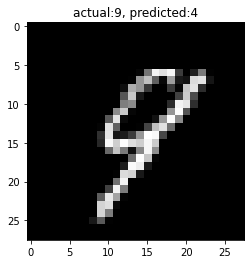

In [124]:
plot_img_3d_tensor(x_test, 92, df['actual_cat'], df['pred_cat'])

In [136]:
filters = model.get_weights()

In [192]:
model.layers

In [242]:
filters, biases = model.layers[0].get_weights()

In [243]:
weights = model.layers[0]

In [244]:
filters.shape

(3, 3, 1, 8)

In [289]:
# retrieve weights from the second hidden layer
filters, biases = model.layers[0].get_weights()

In [290]:
filters[:, :, :, 0].shape

(3, 3, 1)

In [349]:
#Iterate through all the layers of the model
for layer in model.layers:
    if 'conv' in layer.name:
        weights, bias= layer.get_weights()
        print(layer.name, filters.shape)

conv2d_5 (3, 3, 1, 8)


In [350]:
#normalize filter values between 0 and 1 for visualization
f_min, f_max = weights.min(), weights.max()
filters = (weights - f_min) / (f_max - f_min)  
print(filters.shape[3])
filter_cnt=1

8


In [293]:
filt[:,:,:]

array([[[0.14517815],
        [0.2513268 ],
        [0.35672367]],

       [[0.3234593 ],
        [0.36097726],
        [0.31497592]],

       [[0.3577921 ],
        [0.21566434],
        [0.27744746]]], dtype=float32)

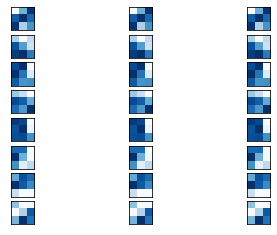

In [351]:
#plotting all the filters
filter_cnt = 1
for i in range(filters.shape[3]):
    #get the filters
    filt=filters[:,:,:,i]
    #plotting each of the channel, color image RGB channels
    for j in range(filters.shape[0]):
        ax= plt.subplot(filters.shape[3], filters.shape[0], filter_cnt)
        ax.set_xticks([])
        ax.set_yticks([])
        ax
        plt.imshow(filt[:,:,:], cmap = 'Blues')
        filter_cnt+=1
plt.show()

In [331]:
filters[:, :, :, 0]

array([[[0.14517815],
        [0.2513268 ],
        [0.35672367]],

       [[0.3234593 ],
        [0.36097726],
        [0.31497592]],

       [[0.3577921 ],
        [0.21566434],
        [0.27744746]]], dtype=float32)